In [ ]:
!conda install -c anaconda seaborn -y

/bin/bash: conda: command not found


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()

In [ ]:
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df['Target'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


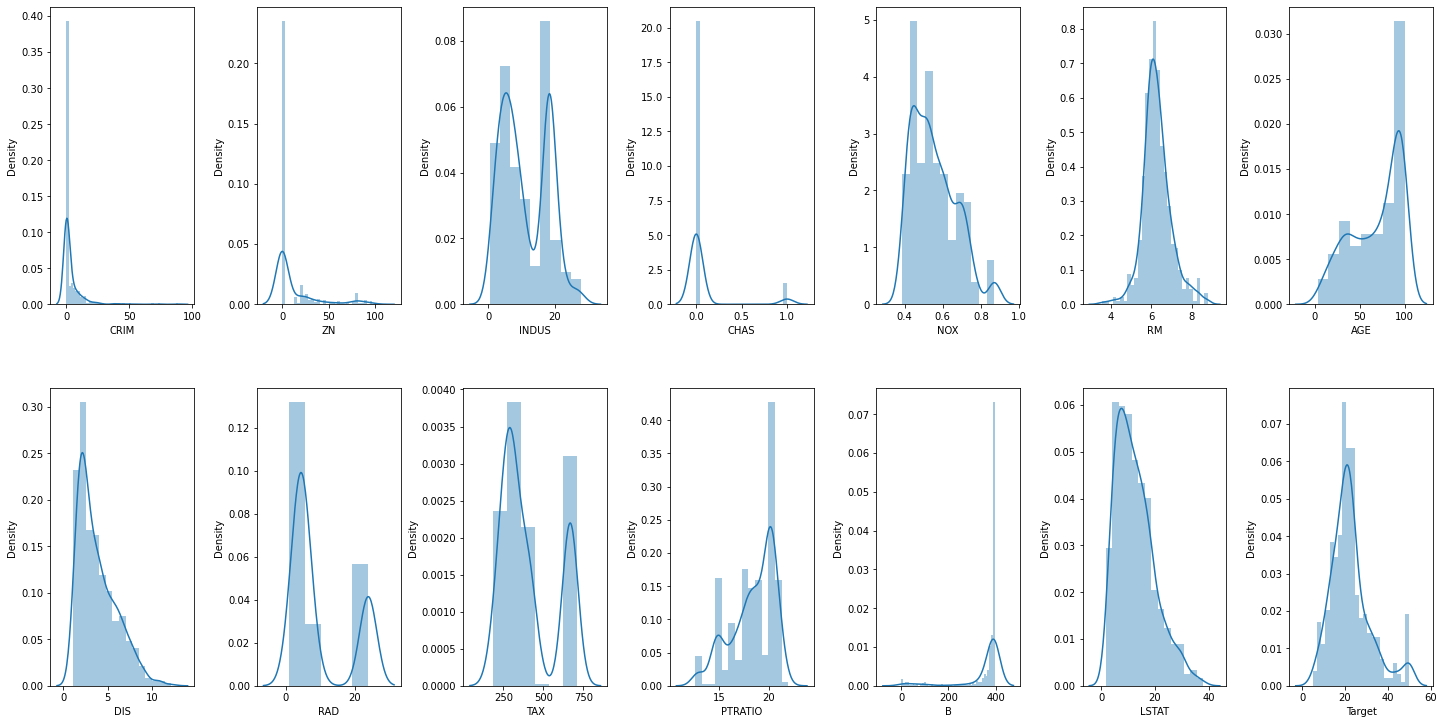

In [ ]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


In [ ]:
##Min-Max Normalization


In [ ]:
cols = ['CRIM' ,'ZN' ,'TAX','B']
for col in cols:
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col] - minimum) / (maximum - minimum)
    


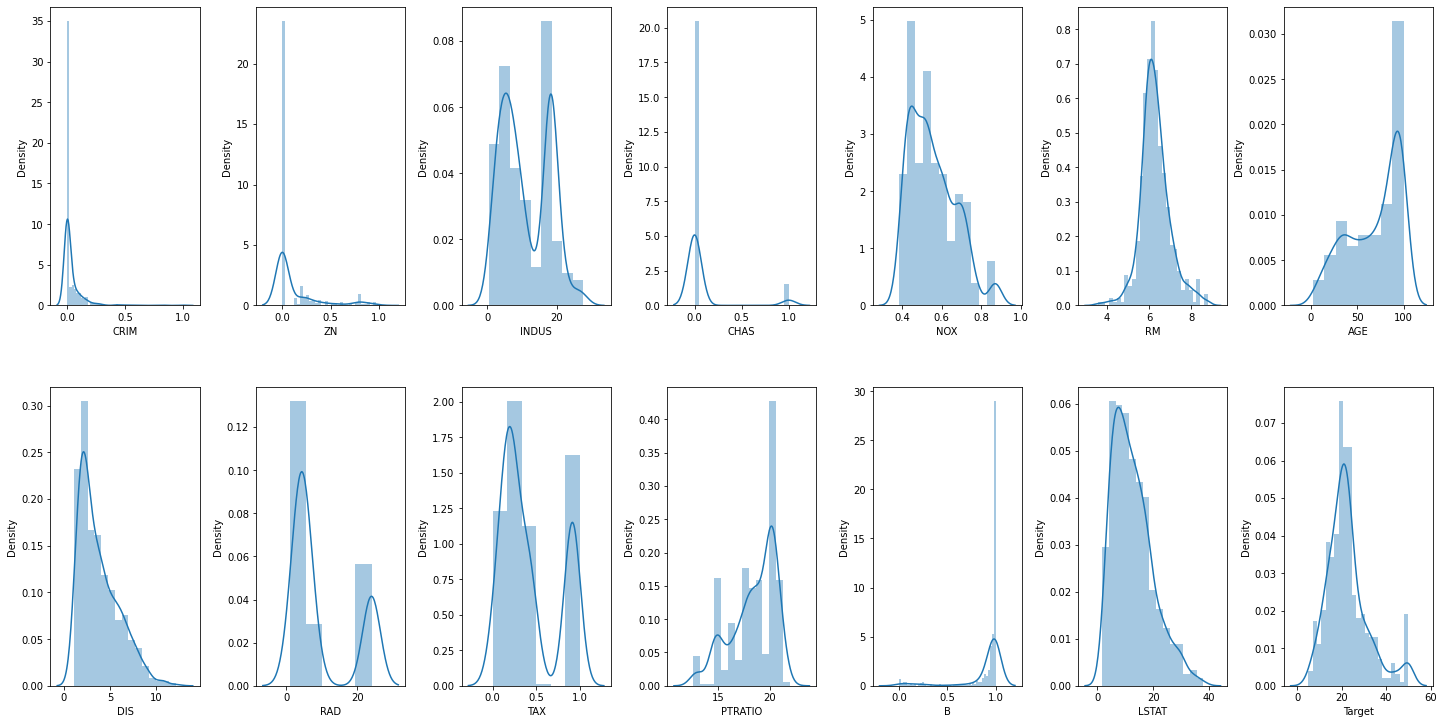

In [ ]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [ ]:
#Standardization

In [ ]:
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

scaled_columns = scalar.fit_transform(df[cols])
scaled_cols = pd.DataFrame(scaled_columns, columns = cols)

In [ ]:
scaled_cols.head()

,CRIM,ZN,TAX,B
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052


In [ ]:
!pip install --user scikit-learn

In [ ]:
for col in cols:
    df[col] = scaled_cols[col]

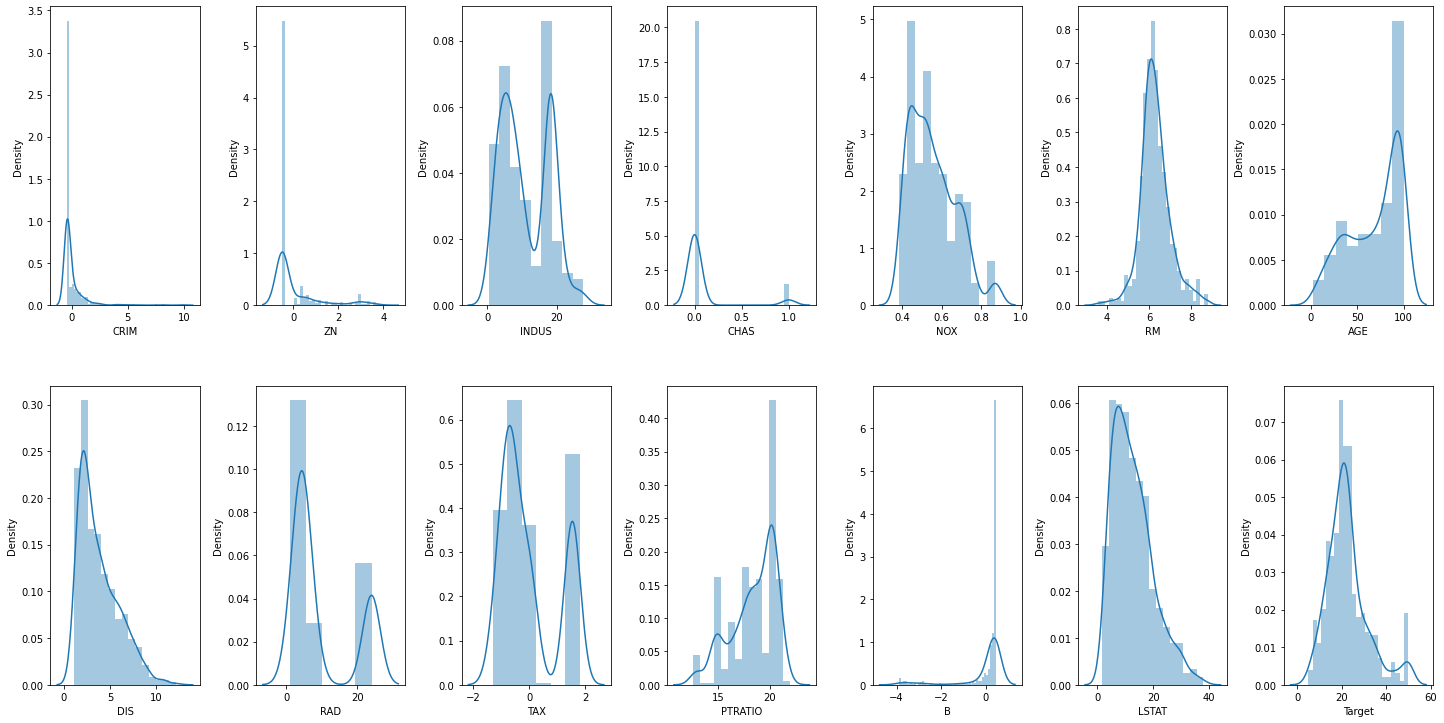

In [ ]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [ ]:
##Overfitting and Underfitting

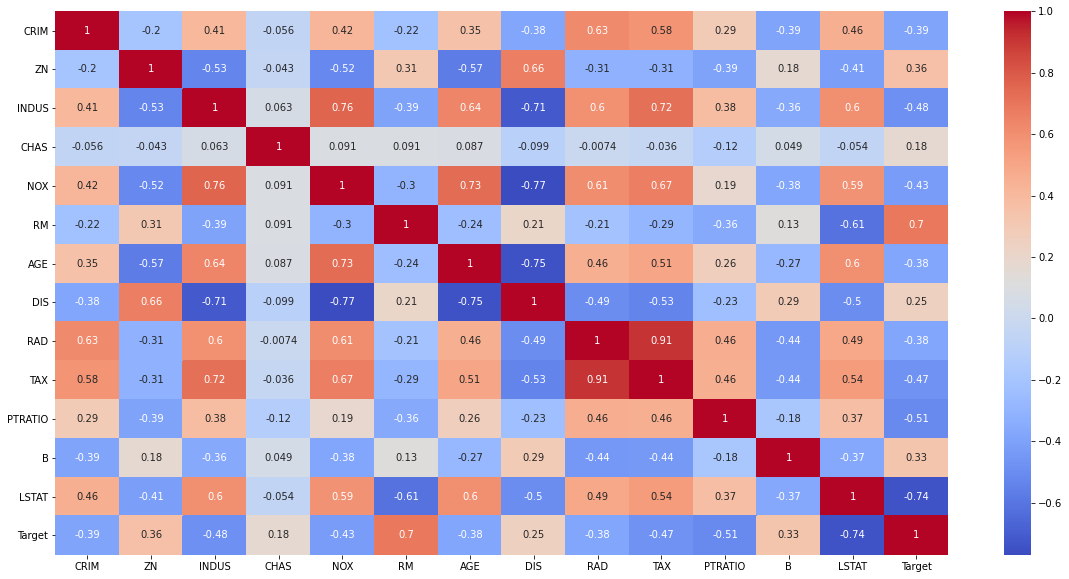

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

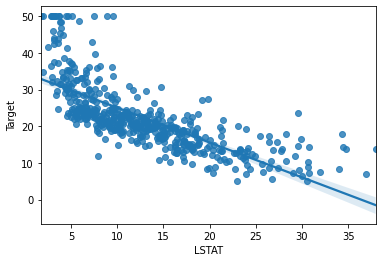

In [ ]:
sns.regplot(y=df['Target'],x=df['LSTAT'])

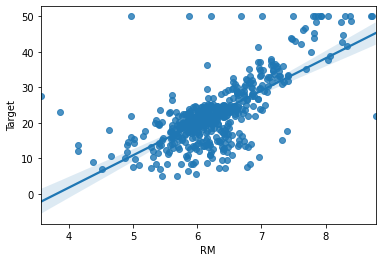

In [ ]:
sns.regplot(y=df['Target'], x=df['RM'])

In [ ]:
x = df.drop(columns = ['Target', 'RAD'], axis = 1)
y = df['Target']

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, x, y):

  #train the model
  x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)
  model.fit(x_train, y_train)

  #predict the training set
  pred = model.predict(x_test)

  #perform cross-validation
  cv_score = cross_val_score(model, x, y, scoring ='neg_mean_squared_error', cv = 5)
  cv_score = np.abs(np.mean(cv_score))

  print("Model Report")
  print("MSE:", mean_squared_error(y_test, pred))
  print('CV Score: ', cv_score)

Model Report
MSE: 23.8710050673649
CV Score:  35.581366210769204


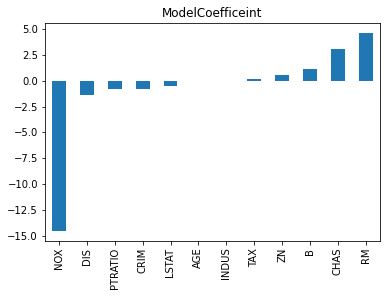

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
train(model, x, y)
coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind='bar',title = 'ModelCoefficeint')

Model Report
MSE: 20.262047244094493
CV Score:  42.844610755193166


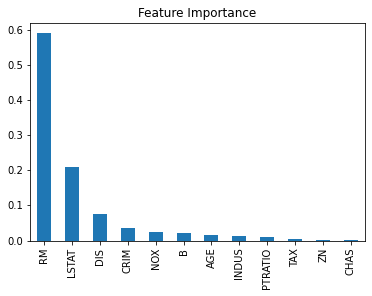

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, x, y)
coef= pd.Series(model.feature_importances_, x.columns).sort_values(ascending = False)
coef.plot(kind='bar', title='Feature Importance')


Model Report
MSE: 10.40964858267717
CV Score:  19.323966972277212


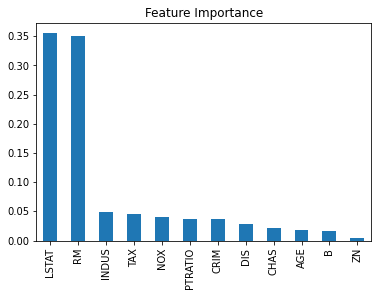

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, x, y)
coef= pd.Series(model.feature_importances_, x.columns).sort_values(ascending = False)
coef.plot(kind='bar', title='Feature Importance')

Model Report
MSE: 10.19589496850394
CV Score:  21.772418994292366


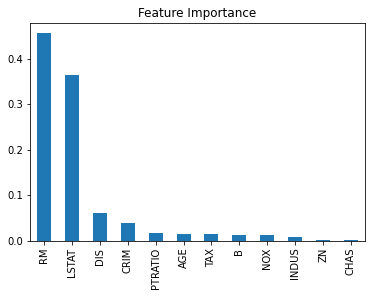

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, x, y)
coef= pd.Series(model.feature_importances_, x.columns).sort_values(ascending = False)
coef.plot(kind='bar', title='Feature Importance')

[14:59:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:59:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:59:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:59:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:59:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:59:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model Report
MSE: 10.032316106542387
CV Score:  17.971291041858336


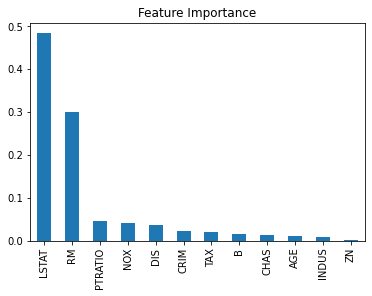

In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor()
train(model, x, y)
coef= pd.Series(model.feature_importances_, x.columns).sort_values(ascending = False)
coef.plot(kind='bar', title='Feature Importance')